
=== Standard Linear Regression Parameters ===
Weight (m): 52.74342374590863
Bias (b): -0.33377782560722613

=== Mean Squared Error (Standard Regression) ===
MSE: 110.4378316313167

=== Ridge Regression Parameters ===
Weight (m): 47.62796320640477
Bias (b): -0.39491374426823583

=== Mean Squared Error (Ridge Regression) ===
MSE: 122.25192735576522


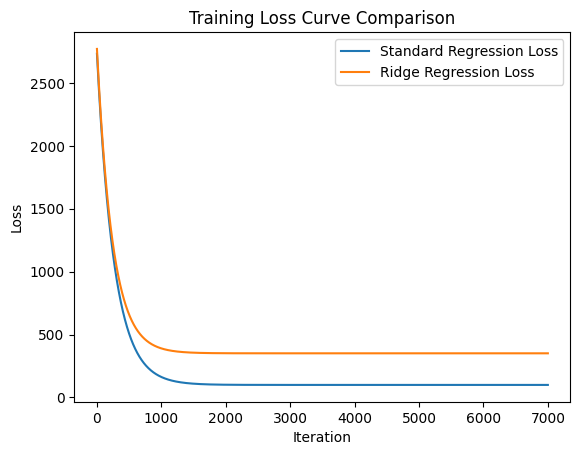


=== Closed-form Ridge Regression Parameters ===
Weight (m): 52.73598792691733
Bias (b): -0.3338629653682158

=== Mean Squared Error (Closed-form Ridge Regression) ===
MSE: 110.41538156212263

=== Predictive Distribution ===
Predictive Mean (first 5 values): [-45.84237647  58.89774512 -49.12675743 -19.25249735  -0.73674735]
Predictive Variance (first 5 values): [0.23360961 0.31825603 0.2491052  0.14879557 0.1324595 ]


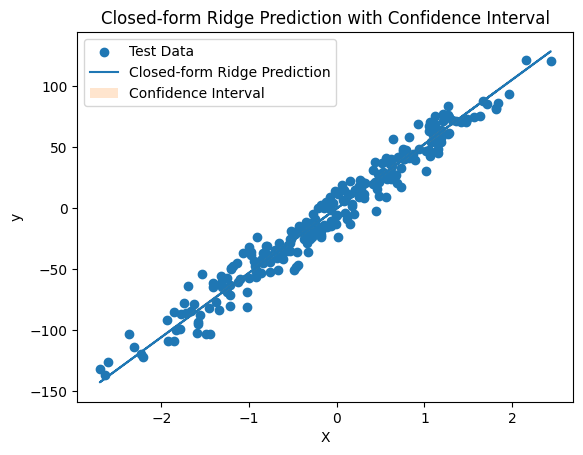

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

# Load dataset
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

# Reshape targets
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Add bias term (column of ones)
train_data = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
test_data = np.hstack((x_test, np.ones((x_test.shape[0], 1))))

# ==============================
# Task 1: Standard Linear Regression (Gradient Descent)
# ==============================
def linear_regression_train(x_train, y_train, lr=1e-3, iterations=7000):
    N = x_train.shape[0]
    weight = np.random.randn(2)
    loss = np.zeros(iterations)

    for i in range(iterations):
        y_pred = x_train @ weight  # Compute predicted values

        loss[i] = np.mean((y_train - y_pred)**2)  # Compute MSE

        # Compute gradients
        m_gradient = -(2/N) * np.sum(x_train[:, 0] * (y_train - y_pred))  # Compute gradient for weight
        b_gradient = -(2/N) * np.sum((y_train - y_pred))  # Compute gradient for bias

        # Update weights
        weight[0] -= lr * m_gradient  # Apply gradient descent for weight, lr is learning rate.
        weight[1] -= lr * b_gradient  # Apply gradient descent for bias

    return weight, loss

weight_standard, loss_standard = linear_regression_train(train_data, y_train)

print("\n=== Standard Linear Regression Parameters ===")
print(f'Weight (m): {weight_standard[0]}')  # Print weight[0]
print(f'Bias (b): {weight_standard[1]}')  # Print weight[1]

# ==============================
# Task 2: Compute MSE
# ==============================
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)  # Compute MSE formula

y_pred_standard = test_data @ weight_standard  # Compute predictions for test data
mse_standard = compute_mse(y_test, y_pred_standard)

print("\n=== Mean Squared Error (Standard Regression) ===")
print(f'MSE: {mse_standard}')

# ==============================
# Task 3: Ridge Regression (Gradient Descent)
# ==============================
def ridge_regression_train(x_train, y_train, lr=1e-3, iterations=7000, lambda_reg=0.1):
    weight = np.random.randn(2)
    loss = np.zeros(iterations)
    N = x_train.shape[0]

    for i in range(iterations):
        y_pred = x_train @ weight  # Compute predicted values

        mse_part = np.mean((y_train - y_pred)**2)
        reg_part = lambda_reg * np.sum(weight**2)
        loss[i] = mse_part + reg_part # Compute MSE with regularization term

        # Compute gradients with regularization
        m_gradient = -(2/N) * np.sum(x_train[:, 0] * (y_train - y_pred)) + 2 * lambda_reg * weight[0] # Compute weight gradient with regularization
        b_gradient = -(2/N) * np.sum(y_train - y_pred) + 2 * lambda_reg * weight[1] # Compute bias gradient

        # Update weights
        weight[0] -= lr * m_gradient  # Apply gradient descent for weight
        weight[1] -= lr * b_gradient  # Apply gradient descent for bias

    return weight, loss

weight_ridge, loss_ridge = ridge_regression_train(train_data, y_train)

print("\n=== Ridge Regression Parameters ===")
print(f'Weight (m): {weight_ridge[0]}')
print(f'Bias (b): {weight_ridge[1]}')

y_pred_ridge = test_data @ weight_ridge  # Compute predictions for test data using weight_ridge
mse_ridge = compute_mse(y_test, y_pred_ridge)

print("\n=== Mean Squared Error (Ridge Regression) ===")
print(f'MSE: {mse_ridge}')

# ==============================
# Task 4: Plot Loss Curve
# ==============================
plt.plot(loss_standard, label='Standard Regression Loss')
plt.plot(loss_ridge, label='Ridge Regression Loss')
plt.title('Training Loss Curve Comparison')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ==============================
# Task 5: Closed-form Ridge Regression
# ==============================
def closed_form_ridge(x_train, y_train, lambda_reg=0.1):
    I = np.eye(x_train.shape[1])
    w_closed_form = np.linalg.inv(x_train.T @ x_train + lambda_reg * I) @ (x_train.T @ y_train) # Compute closed-form solution (Equation 4.27)
    return w_closed_form

weight_closed_form = closed_form_ridge(train_data, y_train)
y_pred_closed_form = test_data @ weight_closed_form  # Compute predictions for test data using weight_closed_form
mse_closed_form = compute_mse(y_test, y_pred_closed_form)

print("\n=== Closed-form Ridge Regression Parameters ===")
print(f'Weight (m): {weight_closed_form[0]}')
print(f'Bias (b): {weight_closed_form[1]}')
print("\n=== Mean Squared Error (Closed-form Ridge Regression) ===")
print(f'MSE: {mse_closed_form}')

# ==============================
# Task 6: Predictive Distribution
# ==============================
predictive_mean = test_data @ weight_closed_form  # Compute predictive mean

residuals = y_train - (train_data @ weight_closed_form)
sigma2 = np.mean(residuals**2)  # Approximate noise variance

lambda_reg = 0.1  # Regularization
S = np.linalg.inv(train_data.T @ train_data + lambda_reg * np.eye(train_data.shape[1])) * sigma2

predictive_variance = np.array([test_data[i, :] @ S @ test_data[i, :].T for i in range(test_data.shape[0])])    # Compute predictive variance

print("\n=== Predictive Distribution ===")
print(f'Predictive Mean (first 5 values): {predictive_mean[:5]}')
print(f'Predictive Variance (first 5 values): {predictive_variance[:5]}')

# ==============================
# Task 7: Plot Predictions
# ==============================

plt.scatter(x_test, y_test, label='Test Data')
plt.plot(x_test, y_pred_closed_form, label='Closed-form Ridge Prediction')

upper_bound = predictive_mean + 2.0 * np.sqrt(predictive_variance)
lower_bound = predictive_mean - 2.0 * np.sqrt(predictive_variance)

# 塗出信賴區間
plt.fill_between(x_test.reshape(-1),
                 lower_bound,
                 upper_bound,
                 alpha=0.2,
                 label='Confidence Interval')

plt.title('Closed-form Ridge Prediction with Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

